# Node JS Workshop
## by RedHat Mobile QE
### presented by asaleh@redhat.com
### assisted by omatskiv@redhat

# Who are we?

We are **RedHat Mobile**
* producing a mobile platform for our customers
* https://developers.redhat.com/mobile/

We are **FeedHenry**
* this is where our open-source projects live 
* http://feedhenry.org/

# Warning: this is a work in progress

* we aim to present this in its final form as a course at local universities
* thank you for helping us test this
* comments welcome :-)


# Goal of this workshop
* setup your development environment
* to show off some nice features in modern JS
* to show the npm package ecosystem 
* by the end you should be able to write a simple web-service :-)

# Timeline
* 9:00 - 9:30 - Dev setup
* 9:30 - 10:30 - JS basics
* 10:30 - 11:00 - creating a simple cli client for a simple service
* 11:00 - ~12:00 - creating a simple web-service
* ~12:00 - lunch

# chat on https://gitter.im/fhnodeschool
# slides on https://git.io/vSMjB


# Development setup
* setting up Node version manager
* creating a project skeleton
* setting up Visual Studio Code (if you want to do debugging)

# Node version manager ✍

First run the install script as your regular user

```
curl -o- https://raw.githubusercontent.com/creationix/nvm/v0.33.1/install.sh | bash
```

Then load nvm in your shell

```
export NVM_DIR="$HOME/.nvm"
[ -s "$NVM_DIR/nvm.sh" ] && . "$NVM_DIR/nvm.sh" # This loads nvm
```

It is advisable to add this to your i.e. bashrc

# Node version manager removal

First unload nvm from your shell

```
nvm unload
```

Then remove the `$NVM_DIR` dir, i.e. `~/.nvm`.

Don't forget to remove automatic sourcing from your i.e. bashrc

# Install node 7.9.0 ✍

```
nvm install 7.9.0
node -v
> v7.9.0
```
Beware, this is not a [LTS release](https://github.com/nodejs/LTS), and will be superseded by v8.x this April.

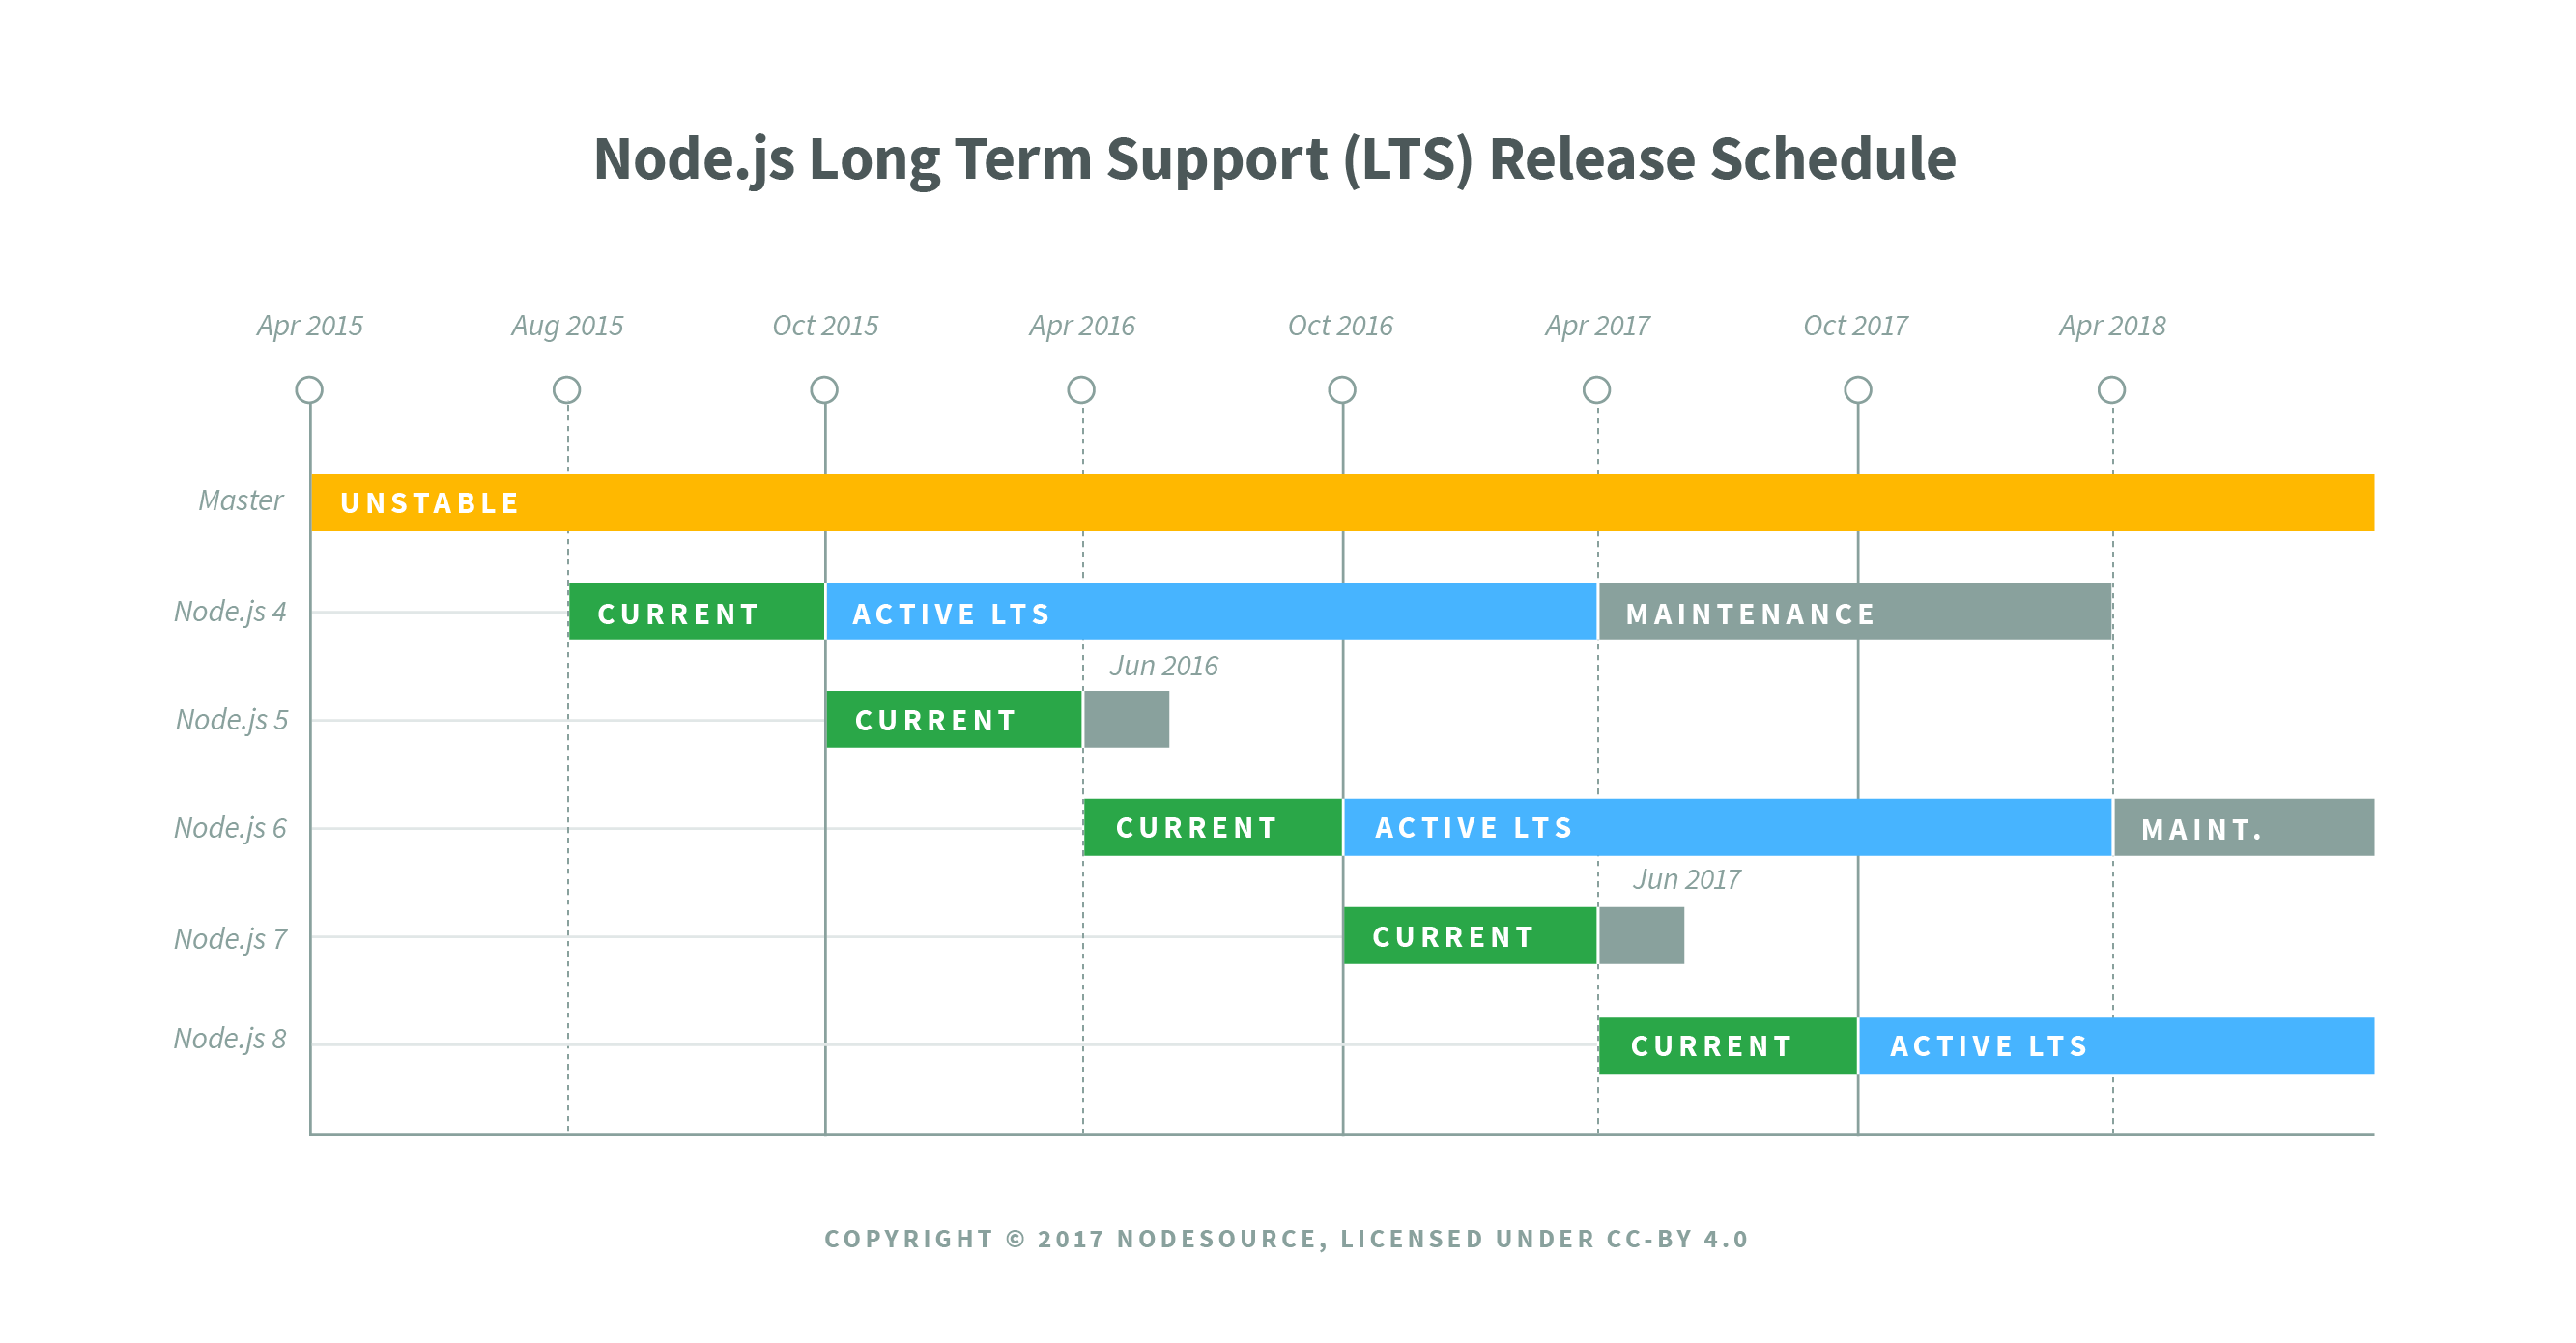

# Hello Node.js! ✍

```
mkdir node-project
cd node-project
echo "console.log('Hello Node.js!');" > index.js
node index.js
> Hello Node.js!
```

# Setup a project ✍

```
npm init -y
```
will create package.json in the directory.
Lets create the entry-point as well.
```
echo "console.log('Hello');\nconsole.log('World');\n" >> index.js
```

# Now you should be able to run it ✍

This is how your index.js looks:
```
cat index.js
> console.log('Hello Node.js!');
> console.log('Hello');
> console.log('World');
```

## ✍
And when you run it:
```
node index.js
> Hello Node.js!
> Hello
> World
```

# Lets inspect the package.json

Currently empty, usually hosts the list of dependencies.

```
{
  "name": "node-project",
  "version": "1.0.0",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "author": "",
  "license": "ISC",
  "keywords": [],
  "description": ""
}
```

# Install Visual Studio Code ✍

We have chose this ide because
* it is user friendly
* has good set of easily configurable plugins available for writing JS
* **DEBUGGER**

If you really don't want this, you should in theory be fine with running node scripts from command-line :-)
### https://code.visualstudio.com/download

## Configure ✍
* Open in the project folder i.e.: `code .`
* Click the debug button
* Click the little gear icon to populate your vscode configuration

```
{
      "type": "node",
      "request": "launch",
      "name": "Launch Program",
      "program": "${workspaceRoot}/index.js",
      "cwd": "${workspaceRoot}"
}
```


* Set a breakpoint somewhere (F10)
* Run (F5)
* Step over the lines (F10)
* Step into (F11)
* Stop the program (Shift-F5)

![Debugging](https://code.visualstudio.com/images/debugging_dimmed-callstack.png)

# Setup lint ✍

```
npm install -g semistandard
semistandard
```
* opinionated ESLint configuration
* in reality you will roll your own ;-)
* i.e. eslint-config-standard-strict or even eslint-plugin-fp

* in VS Code enable vscode-semistandard
* restart VS Code

## Q: Everybody has working debugger? ✍
## Q: Everybody has working lint? ✍


## Disecting the first line

$$ 
\underbrace{console}_\text{global object}\underbrace{.log(\overbrace{'Hello Node.js!'}^\text{string literal as the param})}_\text{method call};
$$


# Quick walk-trhough of Javascript

* I.M.O. a decent functional language
  * anonymous functions, closures, good set of data-types
  * extensible
  * You can find the most of this information on [Mozilla Developer Network](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference)

# Named functions

In [36]:
function log (msg) {
  console.log(msg);
}
log('Hello!');

function add (a, b) {
  return a + b;
}
add(1, 2); // <- this is a function call

Hello!


3

## You don't need to pass in all of the params

In [37]:
log();

undefined


undefined

## Default params for functions

In [38]:
function deflog (msg = 'hello') {
  console.log(msg);
}
deflog();
deflog('world');

hello
world


undefined

## Functions are values

In [39]:
deflog(add);

[Function: add]


undefined

In [40]:
function callTwice (fn) {
  fn();
  fn();
}

undefined

In [41]:
callTwice(deflog);

hello
hello


undefined

# Let for defining variables

In [42]:
function inc1 (c) {
  let cpp = c;
  cpp += 1;
  return cpp;
}
inc1(1);

2

# Const for defining constants

In [ ]:
function inc2 (c) {
  const cpp = c;
  cpp += 1;
  return cpp;
}
inc2(1);

## Nice syntax for embedding data into strings

In [43]:
`When calling add(1,2), we will get ${add(1, 2)}`

'When calling add(1,2), we will get 3'

# Lets build simple command-line util
* we want to be able to parse args
* maybe save some configuration
* maybe read it back

# NPM to find useful packages
* https://www.npmjs.com/
* I chose https://www.npmjs.com/package/yargs for commandline options parsing
* I chose https://www.npmjs.com/package/configstore for storing configuration

After installation you use `require()` function to load the library in your program, i.e:
```
const yargs = require('yargs');
```


# ✍
```
npm install --save yargs
npm install --save configstore
```
Create new client.js file and fill it with:
```
const yargs = require('yargs');

const argv = yargs.usage('$0 <cmd> [args]')
  .command('target <url>', 'choose a target', {})
  .command('current', 'get a target', {})
  .help().argv;

console.log(argv);

```

# ✍
Now you can do 

```
node client.js --help
```

or

```
node client.js target example.com
```

# ✍
Lets replace console.log(argv); with something more useful 

```
const Configstore = require('configstore');
const conf = new Configstore('courselocker', {});
function run (argv) {
  const command = argv._[0];
  if (command === 'target') {
    conf.set('url', argv.url);
    console.log(`Targetting ${argv.url}`);
  } else if (command === 'current') {
    console.log(`Targetting ${conf.get('url')}`);
  }
}
run(argv);
```


Now you can do 

```
node client.js --help
```

or

```
node client.js target example.com
```
or

```
node client.js current
```
And it does something usefull

## Lets continue with concise syntax for nested datastructures

In [44]:
function getArray () {
  return [1, 2, 3, 4];
}
getArray();

[ 1, 2, 3, 4 ]

In [45]:
getArray()[0];

1

In [46]:
function getObject () {
  return {'a': 1, 'b': 2};
}
getObject();

{ a: 1, b: 2 }

In [47]:
getObject()['a'];

1

In [48]:
getObject().a;

1

In [49]:
function getData () {
  const data = {
    height: 400,
    labels: ['test', 'staging'],
    configuration: {
      optional: true,
      paths: [{path: './data', recursive: true}, './*']
    }
  };
  return data['configuration'].paths[0].path;
}
getData();

'./data'

# Syntax for destructuring arrays


In [50]:
function destructureData () {
  const data = [1, 2, 3];
  const [, second] = data;
  return second;
}
destructureData();

2

# Syntax for destructuring arrays


In [51]:
function destructureData () {
  const data = [1, 2, 3];
  const [, ...rest] = data;
  return rest;
}
destructureData();

[ 2, 3 ]

# Syntax for destructuring objects

In [52]:
function destructureData () {
  const data = {level: 0, file: 'test.log'};
  const {file} = data;
  return file;
}
destructureData();

'test.log'

In [53]:
function destructureData () {
  const data = {
    height: 400,
    labels: ['test', 'staging'],
    configuration: {
      optional: true,
      paths: [{path: './data', recursive: true}, './*']
    }
  };
  const {configuration: { paths: [{path}, wildcard] }} = data;
  return [wildcard, path];
}
destructureData();

[ './*', './data' ]

# Beware of undefined


In [54]:
function destructureData () {
  const data = {
    height: 400,
    labels: ['test', 'staging'],
    configuration: {
      optional: true,
      paths: [{path: './data', recursive: true}, './*']
    }
  };
  const {configuration: { paths: [wildcard, {path}] }} = data;
  return [wildcard, path];
}
destructureData();

[ { path: './data', recursive: true }, undefined ]

## Destructuring works with function params

In [64]:
function getFirst ([first]) {
  return first;
}
getFirst([1, 2, 3]);

1

In [65]:
function getRest ([, ...rest]) {
  return rest;
}
getRest([1, 2, 3]);

[ 2, 3 ]

## Function hoisting
* or, I lied about statements always being execuded line after line

In [66]:
main();

function main () {
  return below();
}

function below () {
  return 5;
}

5

# Concise function definitions

In [67]:
function execute () {
  const first = () => console.log('first');
  const second = () => console.log('second');
  first();
  second();
}

execute();

first
second


undefined

## Data processing with functions

In [68]:
[1, 2, 3].map(x => x * 2);

[ 2, 4, 6 ]

In [ ]:
[1, 2, 3, 4].reduce((a, b) => a + b);

## Destructuring can be fun here

In [69]:
[{w: 5, h: 10}, {w: 10, h: 100}].map(({w, h}) => w * h);

[ 50, 1000 ]

In [92]:
[[1, 2, 3, 4], [10, 20, 30, 40]].map(
    ([first, ...rest]) => [...rest, first]);

[ [ 2, 3, 4, 1 ], [ 20, 30, 40, 10 ] ]

## Scope closure
* good for anonymous functions
* creating pseudo-objects :)

In [72]:
function onlyGreater (n, arr) {
  return arr.filter(x => x > n);
}
onlyGreater(5, [1, 7, 2, 5, 8, 3, 6, 4]);

[ 7, 8, 6 ]

## Scope closure
* good for anonymous functions
* creating pseudo-objects :)

In [73]:
function getCounter () {
  let i = 0;
  return () => console.log(i++);
}
const d = getCounter();

undefined

In [76]:
d();

2


undefined

## Objects

In [77]:
class Rectangle {
  constructor (height, width) {
    this.height = height;
    this.width = width;
  }
  area () {
    return this.width * this.height;
  }
}

const rectangle = new Rectangle(20, 10);
rectangle.area();


SyntaxError: Identifier 'Rectangle' has already been declared

## Extending Objects

In [78]:
class Square extends Rectangle {
  constructor (side) {
    super(side, side);
  }
}
const square = new Square(20);
square.area();

SyntaxError: Identifier 'Square' has already been declared

## Problem with referencing methods

In [79]:
function methodRef () {
  const sq = new Square(10);
  const areaFn = sq.area;
  return areaFn();
}

methodRef();

TypeError: Cannot read property 'width' of undefined

## Explicit call

In [80]:
function explicitCall () {
  const sq = new Square(10);
  const areaFn = sq.area;
  return areaFn.call(sq);
}

explicitCall();

100

## If the method doesn't reference *this*, it will work

In [81]:
function methodLog () {
  const logfn = console.log;
  return logfn('This works');
}

methodLog();

This works


undefined

## Do you want to know more?

* We don't have time to dive deeper
* Good textbook is [You-Dont-Know-JS](https://github.com/getify/You-Dont-Know-JS)
* Good explanation is [Working with Objects on Mozilla Developer Network](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Working_with_Objects)

# Few Async examples
* good testing function is `setTimout(fn, milliseconds)`, 
  * that will call `fn()`,
  * after amount of `milliseconds` have passed

In [19]:
console.log('Ping');
setTimeout(() => console.log('Pong'), 2000);
console.log('Ping');

Ping
Ping


undefined

Pong


## Lets try to make a countdown from 3 to 0!

In [10]:
console.log(3);
console.log(2);
console.log(1);
console.log('Boom!');

3
2
1
Boom!


undefined

* Now make it delayed by 1 second

In [83]:
setTimeout(() => {
  console.log(2);

  setTimeout(() => {
    console.log(1);

    setTimeout(() => {
      console.log('Boom!');
    }, 1000);
  }, 1000);
}, 1000);
0

0

2
1
Boom!


## We can wrap this in a Promise

In [84]:
function timeout (time) {
  return new Promise((resolve, reject) => {
    try {
      setTimeout(resolve, 1000);
    } catch (e) {
      reject(e);
    }
  });
}

undefined

## Now the code looks nicer

In [85]:
timeout(1000).then(() => {
  console.log(3);
  return timeout(1000);
}).then(() => {
  console.log(2);
  return timeout(1000);
}).then(() => {
  console.log(1);
  return timeout(1000);
}).then(() => {
  console.log('BOOM');
});

Promise { <pending> }

3
2
1
BOOM


## There is nicer syntax that works with promises

In [86]:
async function countdown() {
  await timeout(1000);
  console.log(3);
  await timeout(1000);
  console.log(2);
  await timeout(1000);
  console.log(1);
  await timeout(1000);
  console.log('BOOM');
}
countdown();

Promise { <pending> }

3
2
1
BOOM


## Now we can continue with our client util

* we will need a way to send http requests
```
npm install --save request
npm install --save request-promise
```
* lets configure the library in our client.js

```
const request = require('request-promise');

let jsonRequest = request.defaults({
  json: true
});
```

![deps](https://www.tomas-dvorak.cz/images/request_dependencies.png)

## Changing run function to async ✍

Requests will be async, so our function should be as well.

```
async function run (arg) {
```

## We need to add more commands to our yargs config ✍
```
.command('create', 'create new locker', {})
.command('delete <id>', 'delete new locker', {})
.command('list <id>', 'list files in locker', {})
```

## Now we add stubs ✍

```
  } else if (command === 'create') {
    // not implemented
  } else if (command === 'delete') {
    // not implemented
  } else if (command === 'list') {
    // not implemented
  }
```

# We implement create ✍

```
} else if (command === 'create') {
    const locker = await jsonRequest.post(`${conf.get('url')}/`);
    console.log(locker.id);
}
```
This makes cli commands
```
node client.js target http://www.example.com
export ID=`node client.js create`
```

roughly the same as running
```
curl -X GET http://www.example.com
```

# We implement delete ✍

```
} else if (command === 'delete') {
    await jsonRequest.delete(`${conf.get('url')}/${argv.id}`);
}
```
This makes cli commands
```
node client.js target http://www.example.com
node client.js delete $ID
```

the same as running
```
curl -X DELETE http://www.example.com/$ID
```

# We implement list ✍

```
else if (command === 'list') {
    const listResponse = await jsonRequest.get(`${conf.get('url')}/${argv.id}/items`);
    for (let file of listResponse) {
      console.log(file);
    }
}
```
This makes cli commands
```
node client.js target http://www.example.com
node client.js list $ID
```

the same as running
```
curl -X GET http://www.example.com/$ID/items
```
This will probably be empty, unless you manually uploaded something.

## Handling files in nodejs
* Now we would like to upload a thing, i.e. an equivalent of 
```
curl -X "POST" --data-binary @test.pdf  http://localhost:8000/$ID/item/test.pdf
```
* to do this we need to be able to read files
* nodejs has internal [module called 'fs'](https://nodejs.org/dist/latest-v7.x/docs/api/fs.html)
* because it is internal to nodejs, we don't need to install anything

## Read Stream
* is an object
* asynchronous reading with events
* subscribing to events with `on`

$$ 
\text{stream.on(}\underbrace{'data'}_\text{name of the event}\text{,}\underbrace{data => console.log(data.toString('utf8'))}_\text{function that will be called when the event is emited};
$$


In [87]:
function printFile (path) {
  const fs = require('fs');
  const stream = fs.createReadStream(path);
  stream.on('data', data => console.log(data.toString('utf8')));
  stream.on('end', () => console.log('EOF'));
  stream.on('err', (err) => console.log(`Err:${err}`));
}
printFile('hello.md');

undefined

# HELLO

EOF


## Write Stream
* is an object
* asynchronous writing
* you should still listen to on error
* for small chunks of data:
```
const stream = fs.createWriteStream(path);
stream.write('data);
stream.end();
```

# Async `cp` with pipe

In [90]:
printFile('hello005.md');

undefined

Error: ENOENT: no such file or directory, open 'hello005.md'

In [88]:
function cp(from, to) {
  const reading = fs.createReadStream(from);
  const writing = fs.createWriteStream(to);
  reading.on('err', (err) => console.log(`Err:${err}`));
  writing.on('err', (err) => console.log(`Err:${err}`));
  reading.pipe(writing);
}
cp('hello.md', 'hello005.md');

undefined

## Now we can finish the client
* requests objects are *streams* as well as *promises*
* we can just pipe the file into it :)

# Add `fs` and last two commands ✍
No need for npm to install anything;
```
const fs = require('fs');
```
Last two commands:
```
.command('upload <id> <file>', 'upload file to locker', {})
.command('download <id> <file>', 'download file from locker', {})
```

# Implement upload ✍
```
else if (command === 'upload') {
    const file = fs.createReadStream(argv.file);
    const upload = jsonRequest.post(`${conf.get('url')}/${argv.id}/item/${argv.file}`);

    file.pipe(upload);

    const response = await upload;
    console.log(response);
  }
```

# Implement download ✍
```
 else if (command === 'download') {
    const file = fs.createWriteStream(argv.file);
    const download = jsonRequest.get(`${conf.get('url')}/${argv.id}/item/${argv.file}`);

    download.pipe(file);
    
    await download;
    console.log('Downloaded');
  }
```

# Who can find a bug in upload?
```
else if (command === 'upload') {
    const file = fs.createReadStream(argv.file);
    const upload = jsonRequest.post(
      `${conf.get('url')}/${argv.id}/item/${argv.file}`
    );

    file.pipe(upload);

    const response = await upload;
    console.log(response);
  }
```

# Who can find a bug in upload?
```
else if (command === 'upload') {
    const path = require('path');
    const file = fs.createReadStream(argv.file);
    const upload = jsonRequest.post(
      `${conf.get('url')}/${argv.id}/item/${path.basename(argv.file)}`
    );

    file.pipe(upload);

    const response = await upload;
    console.log(response);
  }
```

# Client is done!
* we have implemented all of the necessary commands
* we can create, list, upload, download files to server :) 

# Questions?

# Continue with server side! ✍

We will use https://www.npmjs.com/package/express
```
npm install --save express
touch server.js
```

## Initial contents of server.js ✍

paste in

```
const express = require('express');
const app = express();
const router = express.Router();

app.use('/locker', router);
app.listen(8000, function () {
  console.log('Listening at http://localhost:8000/locker');
});

router.get('/', (req, res) => {
  res.status(200).json('Hello');
});

```

## Now you can start the server ✍
```
node server.js
curl http://localhost:8000
> ... Cannot GET /...
curl http://localhost:8000/locker
> "Hello"
```

# We need a database
* decided to use pouchdb: https://www.npmjs.com/package/pouchdb
* it is embedded, no need for running service
* it is compatible with couchdb
* [it has nice api](https://pouchdb.com/api.html)
* we will use attachments heavily

```
db.post({'_attachments': {}}); // creates empty locker
db.get(id); // lists things in locker
db.remove(id, rev); // removes locker
db.put(_id:id, _rev:rev,
  _attachments':{ 'test.pdf':  {
    'content_type': 'application/octet-stream',
    'data': buffer
  })
db.getAttachment(id, name); // gets binary blob
```

## Lets install this database ✍
```
npm install --save pouchdb
```
then add to your server.js
```
const PouchDB = require('pouchdb');
const db = new PouchDB('./database');
```
this means that our data will live in sub-folder `database` of our project folder.

## Add the create endpoint ✍
```
router.post('/', async (req, res) => {
  try {
    const dbResponse = await db.post({'_attachments': {}});
    res.status(200).json(dbResponse);
  } catch (exception) {
    res.status(500).json(exception);
  }
});
```

## Add the list endpoint ✍
```
router.get('/:id/items', async ({params: {id}}, res) => {
  try {
    const {_attachments} = await db.get(id);
    res.status(200).json(Object.keys(_attachments));
  } catch (exception) {
    res.status(500).json(exception);
  }
});
```

## Add the delete endpoint ✍
```
router.delete('/:id', async ({params: {id}}, res) => {
  try {
    const doc = await db.get(id);
    const dbResponse = await db.remove(id, doc._rev);
    res.json(dbResponse);
  } catch (exception) {
    res.status(500).json(exception);
  }
});
```

## Now we could use our client to create/list/delete ✍
* don't forget to restart your server
```
node client.js target http://localhost:8000/locker
export ID=`node client.js create`
node client.js list $ID
node client.js delete $ID
```

## Everybody got here OK?

## Let us factor out the try-catch ✍
```
function wrap (responder) {
  return async (req, res) => {
    try {
      await responder(req, res);
    } catch (exception) {
      res.status(500).json(exception);
    }
  };
}
```

## Now we can do a wrap around our router functions ✍
```
router.post('/', wrap(async (req, res) => {
  const dbResponse = await db.post({'_attachments': {}});
  res.status(200).json(dbResponse);
}));

router.get('/:id/items', wrap(async ({params: {id}}, res) => {
  const {_attachments} = await db.get(id);
  res.status(200).json(Object.keys(_attachments));
}));

router.delete('/:id', wrap(async ({params: {id}}, res) => {
  const doc = await db.get(id);
  const dbResponse = await db.remove(id, doc._rev);
  res.status(200).json(dbResponse);
}));

```

## Now lets try our client again ✍
* don't forget to restart your server
```
node client.js target http://localhost:8000/locker
export ID=`node client.js create`
node client.js list $ID
node client.js delete $ID
```
* in real project we would be writing tests
* or if this was 5h workshop ;)

## Add the upload endpoint?

```
router.post('/:id/item/:name', wrap(async (req, res) => {
  const {params:{id, name}} = req;
  
  const buffer = ????????????????????????????????????????????????????????????
  
  const doc = await db.get(id);
  doc['_attachments'][name] = {
    'content_type': 'application/octet-stream',
    'data': buffer
  };
  const response = await db.put(doc);
  res.json(response);
}));
```


## `req` is a stream, but `db.put` wants a buffer


In [91]:
function printFile(path) {
  const fs = require('fs');
  const stream = fs.createReadStream(path);
  stream.on('data', data => console.log(data.toString('utf8')));
  stream.on('end', () => console.log('EOF'));
  stream.on('err', (err) => console.log(`Err:${err}`));
}
printFile('hello.md');

undefined

# HELLO

EOF


## Lets make a converting function ✍

```
function getReqBuffer (req) {
  return new Promise((resolve, reject) => {
    const bufs = [];
    req.on('data', d => bufs.push(d));
    req.on('end', () => resolve(Buffer.concat(bufs)));
    req.on('err', e => reject(e));
  });
}
```

## Now add the upload endpoint! ✍
```
router.post('/:id/item/:name', wrap(async (req, res) => {
  const id = req.params.id;
  const name = req.params.name;
  const buffer = await getReqBuffer(req);
  const doc = await db.get(id);
  doc['_attachments'][name] = {
    'content_type': 'application/octet-stream',
    'data': buffer
  };
  const response = await db.put(doc);
  res.json(response);
}));
```

## At last the download endpoint! ✍
```
router.get('/:id/item/:name', wrap(async (req, res) => {
  const id = req.params.id;
  const name = req.params.name;
  const response = await db.getAttachment(id, name);
  res.type('application/octet-stream');
  res.end(response, 'binary');
}));
```

## Now lets try our client again ✍
* don't forget to restart your server
```
node client.js target http://localhost:8000/locker
export ID=`node client.js create`
node client.js list $ID
>
node client.js upload $ID test.pdf
node client.js list $ID
> test.pdf
rm test.pdf
node client.js download $ID test.pdf
okular test.pdf
```

## Questions?

# Homework?
* Client-side error handling?
* Client should be able to save somewhere else
* Factor out the files into modules
 * i.e router could be in its own file
* add tests?

## Comments welcome :-)
## Fille your bug-reports to https://github.com/feedhenry/nodeschool/issues